In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dropout , Flatten , Dense ,BatchNormalization,Input,ReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping
from tensorflow.keras import models , optimizers , regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

## Obtain the information

In [2]:
# Train dataframe
df_train = pd.read_csv('/kaggle/input/ai-vs-human-generated-dataset/train.csv')

In [3]:
#Test dataframe
df_test = pd.read_csv('/kaggle/input/ai-vs-human-generated-dataset/test.csv')

# Clean data

In [5]:
df_train

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1
...,...,...,...
79945,79945,train_data/9283b107f6274279b6f15bbe77c523aa.jpg,0
79946,79946,train_data/4c6b17fe6dd743428a45773135a10508.jpg,1
79947,79947,train_data/1ccbf96d04e342fd9f629ad55466b29e.jpg,0
79948,79948,train_data/ff960b55f296445abb3c5f304b52e104.jpg,1


In [6]:
# delete Unnamed column
df_train.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
#check if there are empty rows
df_train.isna().sum()

file_name    0
label        0
dtype: int64

In [9]:
#check if thera are duplicated rows
df_train.duplicated().sum()

0

## Exploratory Data

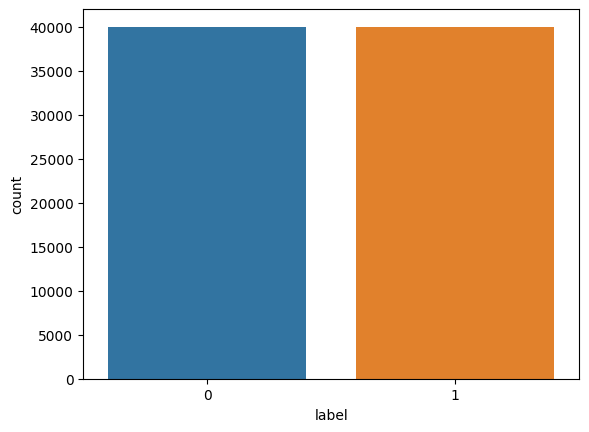

In [12]:
# Watch how is divide the data

sns.countplot(data=df_train , x='label')
plt.show()

In [23]:
df_train['file_name'][0]

'train_data/a6dcb93f596a43249135678dfcfc17ea.jpg'

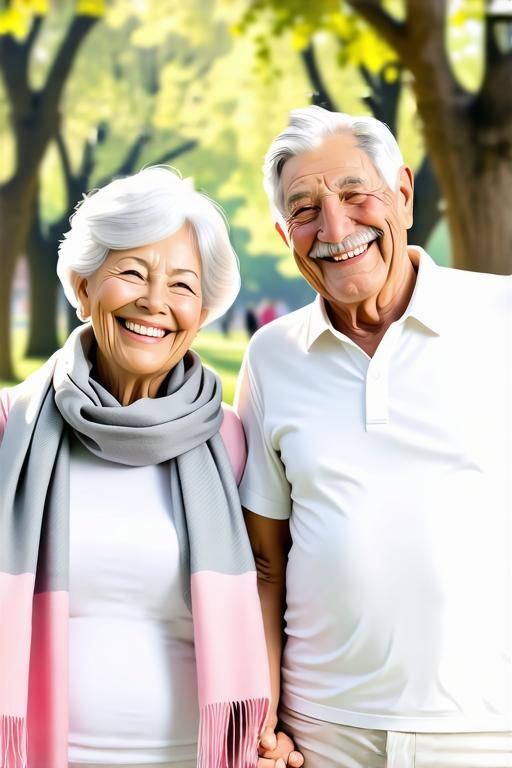

In [29]:
Image.open('/kaggle/input/ai-vs-human-generated-dataset/'+df_train['file_name'][0])

In [8]:
#label 1 -> AI Image
#label 0 -> Human Image
df_train['label'][0]

1

In [24]:
df_train.dtypes

file_name    object
label         int64
dtype: object

## Separete data

In [9]:
import shutil
import os

In [10]:
location_AI = '/kaggle/working/Train_data/AI_Images'
location_Hum = '/kaggle/working/Train_data/Human_Images'

In [11]:
# Crear la carpeta si no existe
os.makedirs(location_AI, exist_ok=True)
os.makedirs(location_Hum, exist_ok=True)

In [12]:
# Separete de images depends of the label

for index , row in df_train.iterrows():
    if row['label'] == 1:
        origin_path = '/kaggle/input/ai-vs-human-generated-dataset/'+ row['file_name']
        dest_path = os.path.join(location_AI,os.path.basename(origin_path))

        # move the to the new carpet
        shutil.copy(origin_path,dest_path)

    else:
        origin_path = '/kaggle/input/ai-vs-human-generated-dataset/' + row['file_name']
        dest_path = os.path.join(location_Hum,os.path.basename(origin_path))

        # move the to the new carpet
        shutil.copy(origin_path,dest_path)
        


        

## Get data and data Argumentation

In [16]:
# data Argumentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.3
    )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_dir = '/kaggle/working/Train_data'

In [ ]:
#Reset train data generator
train_generator.reset()

In [18]:
# Get data 

train_generator = train_datagen.flow_from_directory(train_dir,
                                 target_size=(28,28),
                                 batch_size=64,
                                 class_mode='binary',
                                 color_mode='grayscale',
                                 
                                 subset = "training" 

                                 )

validation_generator = train_datagen.flow_from_directory(train_dir,
                                 target_size=(28,28),
                                 batch_size=64,
                                 class_mode='binary',
                                 color_mode='grayscale',
                                 subset = "validation"
                                 )

Found 55966 images belonging to 2 classes.
Found 23984 images belonging to 2 classes.


In [19]:
train_generator[0][0].shape

(64, 28, 28, 1)

# Divide validation_generetaor data 

- 15 % -> validation
- 15 % -> test

In [20]:
x_val = []
y_val = []
num_batches = len(validation_generator)
for i in range(num_batches):
    batch = validation_generator[i]
    images, labels = batch
    x_val.append(images)
    y_val.append(labels)

x_val = np.concatenate(X_train, axis=0)
y_val = np.concatenate(y_train, axis=0)




NameError: name 'X_train' is not defined

In [25]:
print(f"X_train shape: {len(x_val)}")
print(f"y_train shape: {len(y_val)}")

X_train shape: 375
y_train shape: 375


In [24]:
# Take 50 % of x_val and  y_val to x_test and y_test

x_test = x_val[:187]
y_test = y_val[:187]

x_val = x_val[187:]
y_val = y_val[187:]

In [41]:
print(f"x_test shape: {len(x_test)}")
print(f"x_test shape: {len(x_test)}")
print(f"x_val shape: {len(x_val)}")
print(f"y_val shape: {len(y_val)}")

x_test shape: 187
x_test shape: 187
x_val shape: 188
y_val shape: 188


##  Model

In [33]:
def model1 ():

    model = models.Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),

   
    Conv2D(64,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    
    Conv2D(64,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

   
    Conv2D(128,(2,2),padding='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D((2,2)),
    Dropout(0.5),

    Flatten(),

    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
    ])

    return model

## Callback definition

In [34]:
checkpoint = ModelCheckpoint('best_wights.keras',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compilation

In [35]:
model_1 = model1()

In [36]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training

In [37]:
len(train_generator)

875

In [38]:
hist = model_1.fit(train_generator,
                  steps_per_epoch=55966//64,
                  epochs=50,
                  validation_data=(x_val,y_val),
                  
                  callbacks=[checkpoint])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


868/874 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.7899 - loss: 0.4720

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 48
'y' sizes: 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 48


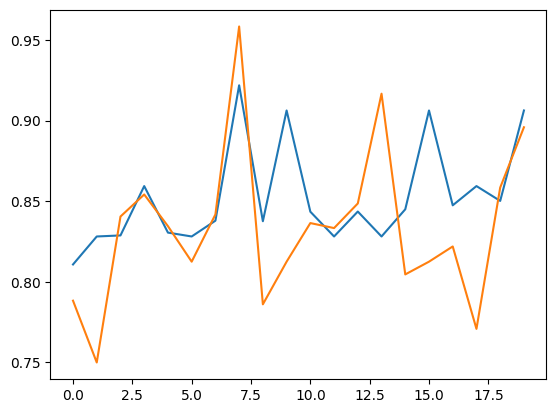

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()